In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import data
dtrain=pd.read_csv('bigdatamart_Train.csv')
dtest=pd.read_csv('bigdatamart_Test.csv')
dtrain

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
dtest

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Data set Attributes

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

EDA of dataset

In [7]:
dtrain.shape

(8523, 12)

In [8]:
dtest.shape

(5681, 11)

In [9]:
dtrain.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Float & str values present in this dataset

In [10]:
dtest.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [11]:
dtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
dtest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [13]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [15]:
dtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
dtest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


To check Nan values

In [17]:
dtrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

NAN values present in data set

In [18]:
dtest.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

NAN values present in test dataset

Dropping Nan Values

In [34]:
df=dtrain.dropna()

In [35]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low_Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low_Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low_Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low_Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low_Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [37]:
df1=dtest.dropna()

In [38]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
13,FDU11,4.785,Low Fat,0.092738,Breads,122.3098,OUT049,1999,Medium,Tier 1,Supermarket Type1
14,DRL59,16.750,LF,0.021206,Hard Drinks,52.0298,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5673,FDF46,7.070,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2
5674,DRL35,15.700,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1
5675,FDW46,13.000,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1


In [54]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [55]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

no missing values in train & test dataset

# Summary of statistics


In [39]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


Observation: mean is more than 50th median for Item_Weight, Item_Visibility, so outliers present in these two columns.
    Difference between max & 75th median is higher in Item_Weight,Item_Visibility & Item_MRP so outliers present in these two columns.

In [40]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,3099.000000,3099.000000,3099.000000,3099.000000
mean,12.658206,0.059063,140.036189,1999.189739
std,4.616934,0.043592,61.608135,7.387906
min,4.555000,0.000000,31.990000,1987.000000
25%,8.675000,0.025824,93.310700,1997.000000
50%,12.350000,0.049154,141.315400,1999.000000
75%,16.600000,0.085354,184.993700,2004.000000
max,21.350000,0.185913,266.588400,2009.000000


Observation: mean is more than 50th median for Item_Weight, Item_Visibility, so outliers present in these two columns. Difference between max & 75th median is higher in Item_Weight,Item_Visibility & Item_MRP so outliers present in these two columns.

In [41]:
#Exploring the data variable
df.Item_Outlet_Sales.unique()

array([3735.138 ,  443.4228, 2097.27  , ...,  858.882 , 3608.636 ,
       2778.3834])

In [42]:
df.Item_Outlet_Sales.value_counts()

1342.2528    11
1438.1280    11
703.0848     10
958.7520     10
1416.8224     9
             ..
1751.0540     1
5077.3908     1
2403.5380     1
600.5516      1
6385.0220     1
Name: Item_Outlet_Sales, Length: 2449, dtype: int64

# Data Visualization

<AxesSubplot:>

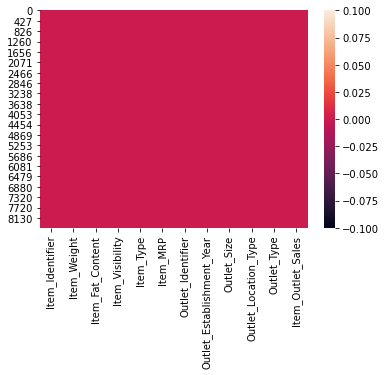

In [43]:
#to check missing values in data set via heat map
sns.heatmap(df.isnull())

Train data set has no null values

<AxesSubplot:>

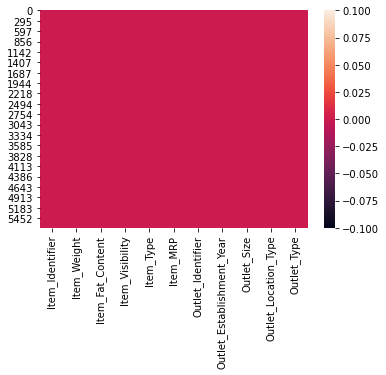

In [44]:
sns.heatmap(df1.isnull())

Test data has no null values

Univariate Analysis

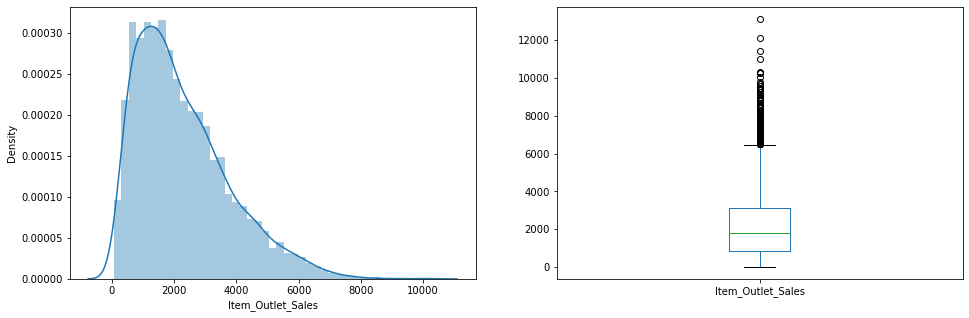

In [45]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Item_Outlet_Sales'])

plt.subplot(122)
dtrain['Item_Outlet_Sales'].plot.box(figsize=(16,5))

plt.show()


Target variable has skewness & Outliers

<AxesSubplot:title={'center':'Outlet_Size'}>

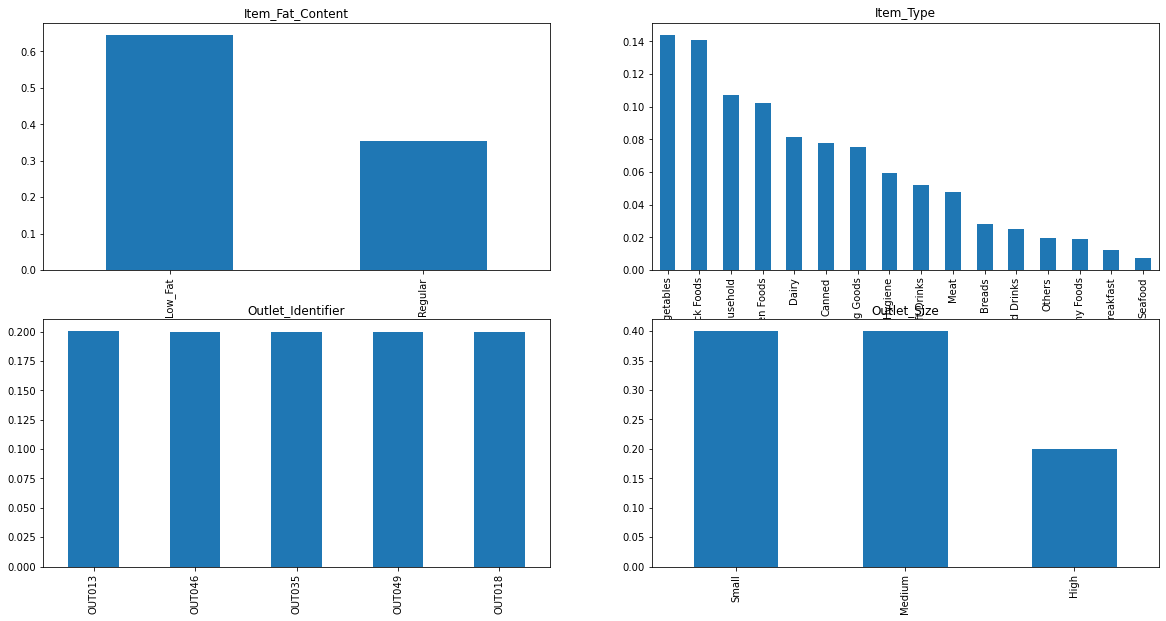

In [46]:
plt.figure(1)
plt.subplot(221)
df['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")

plt.subplot(222)
df['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Type")

plt.subplot(223)
df['Outlet_Identifier'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Identifier")

plt.subplot(224)
df['Outlet_Size'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Size")

As we can see in the Item Fat content is showing regular and low fats in different names so we will change it now

In [47]:
df['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
df['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
df['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

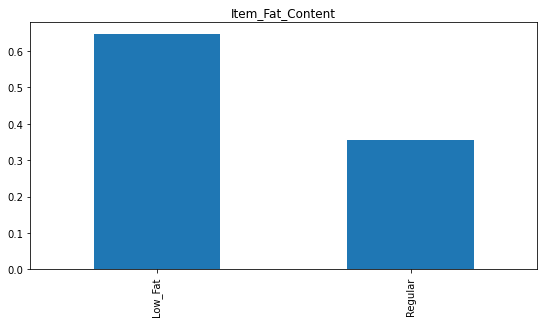

In [48]:
plt.figure(1)
plt.subplot(221)
df['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")
plt.show()

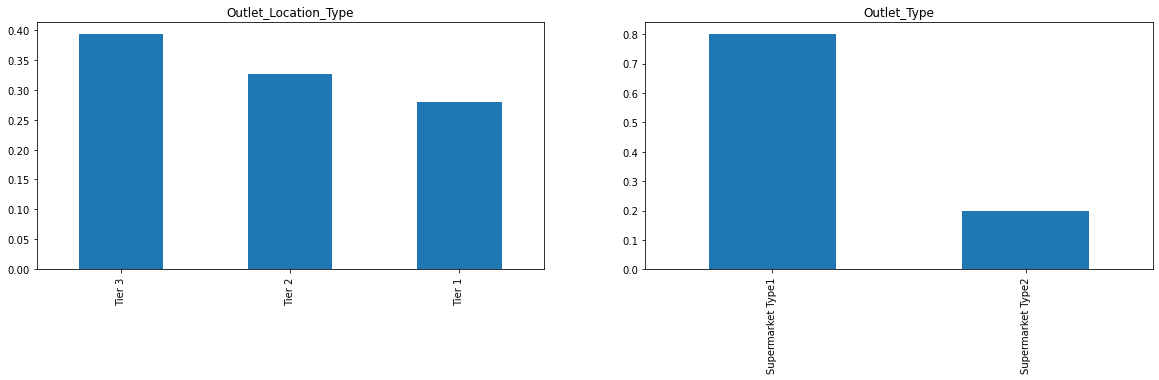

In [49]:
plt.figure(1)
plt.subplot(221)
dtrain['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Location_Type")

plt.subplot(222)
df['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Type")

plt.show()

Data distribution for Each variable to check skewness

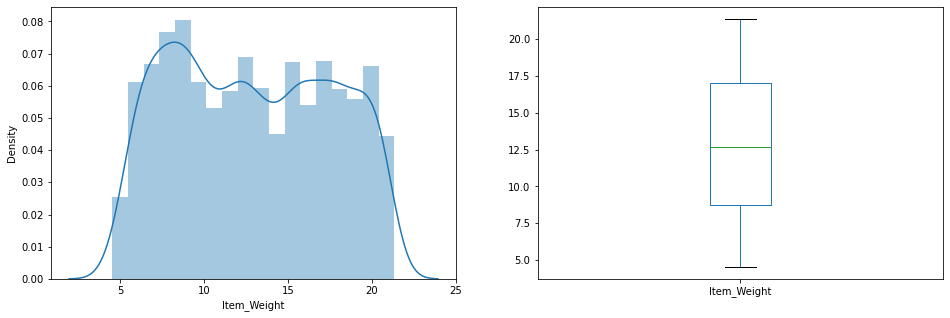

In [50]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Item_Weight'])

plt.subplot(122)
df['Item_Weight'].plot.box(figsize=(16,5))

plt.show()

No outliers & skewness

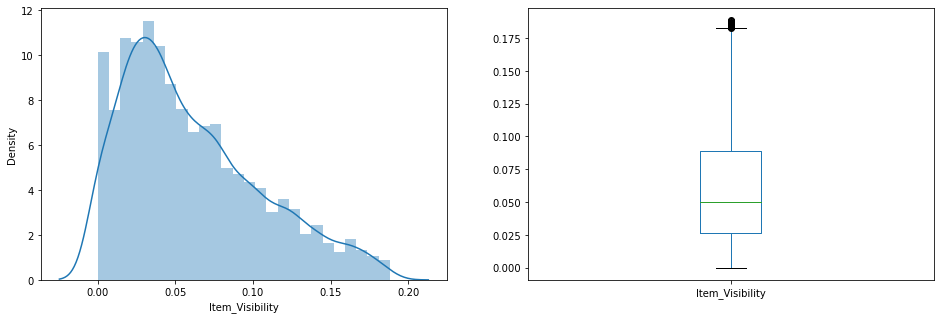

In [51]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Item_Visibility'])

plt.subplot(122)
df['Item_Visibility'].plot.box(figsize=(16,5))

plt.show()

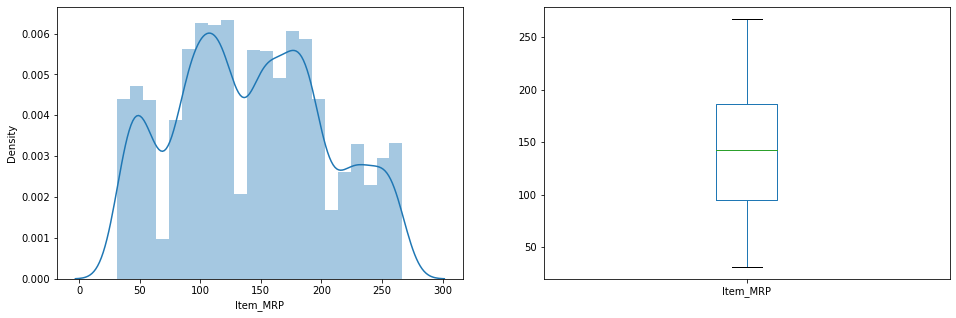

In [52]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Item_MRP'])

plt.subplot(122)
df['Item_MRP'].plot.box(figsize=(16,5))

plt.show()

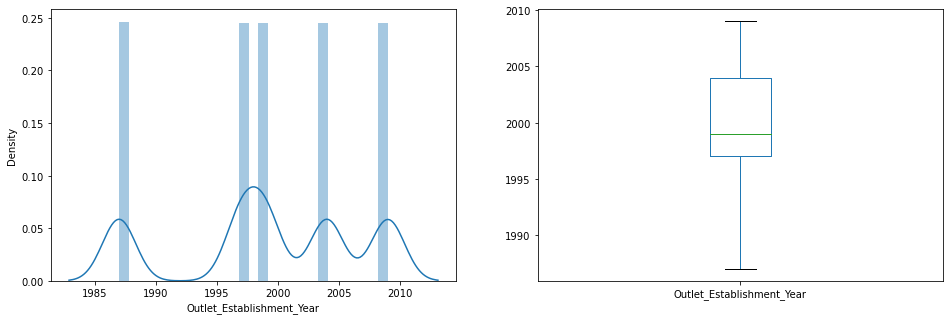

In [53]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Outlet_Establishment_Year'])

plt.subplot(122)
df['Outlet_Establishment_Year'].plot.box(figsize=(16,5))

plt.show()

Bivariate Analysis

<AxesSubplot:xlabel='Item_Fat_Content'>

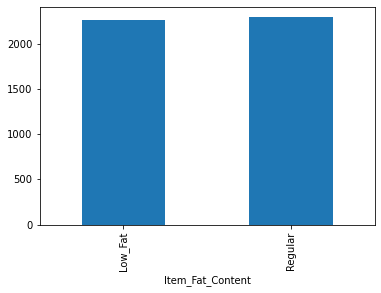

In [56]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Item_Type'>

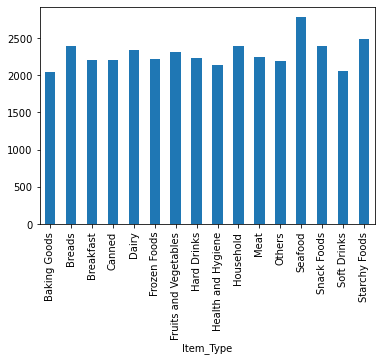

In [57]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Identifier'>

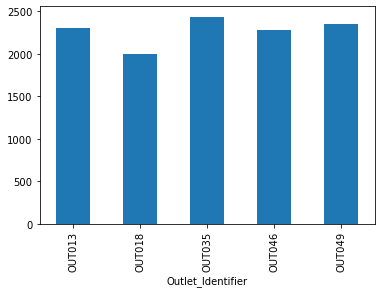

In [58]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Size'>

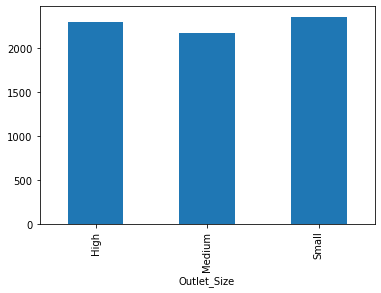

In [59]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Location_Type'>

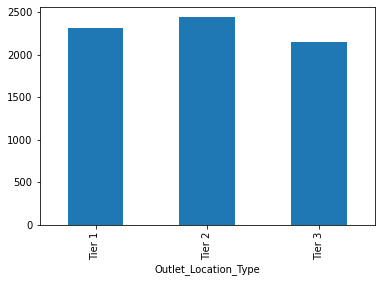

In [60]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Type'>

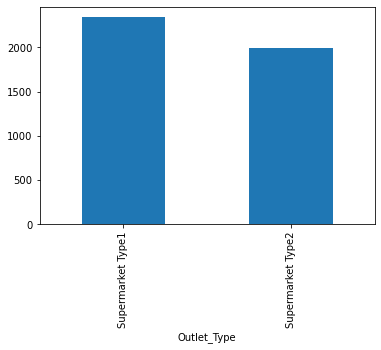

In [61]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

In [62]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

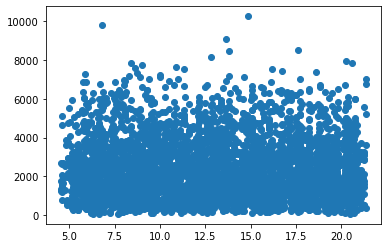

In [63]:
plt.scatter(df['Item_Weight'], df['Item_Outlet_Sales'])

To check Correlation # Use heat map

In [64]:
dfcor=df.corr()
dfcor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.010229,0.033330,-0.010596,0.010972
Item_Visibility,-0.010229,1.000000,-0.007292,0.009324,-0.009644
Item_MRP,0.033330,-0.007292,1.000000,0.004105,0.679594
Outlet_Establishment_Year,-0.010596,0.009324,0.004105,1.000000,-0.040869
Item_Outlet_Sales,0.010972,-0.009644,0.679594,-0.040869,1.000000


<AxesSubplot:>

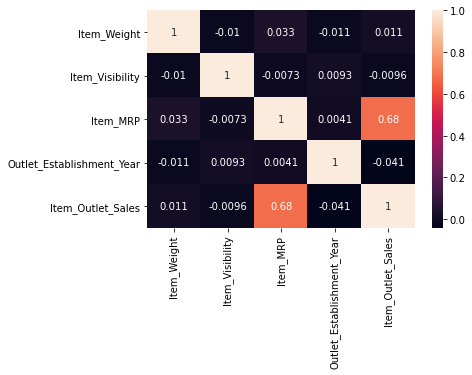

In [65]:
sns.heatmap(dfcor, annot=True)

We see that the most correlated variables are (Item_MRP - Item_Outlet_Sales)

In [66]:
# treating categorical values
df['Outlet_Size'].value_counts()
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [67]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [68]:
df['Item_Weight'].value_counts()
df['Item_Weight'].fillna(df['Item_Weight'].mode()[0], inplace=True)

In [69]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [72]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

# Outlier Treatment in Target variable

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

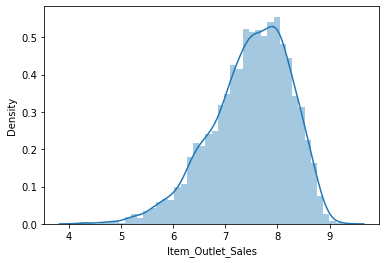

In [70]:
df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales'])
sns.distplot(df['Item_Outlet_Sales'])

# Model Fitting

In [75]:
# Separting the Variable into Independent and Dependent 
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
labelencoder_X = LabelEncoder()

In [79]:
# Item_Fat_Content
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# Item_Type
X[:,3] = labelencoder_X.fit_transform(X[:,3])

# Outlet_Identifier
X[:,5] = labelencoder_X.fit_transform(X[:,5])

# Outlet_Size
X[:,7] = labelencoder_X.fit_transform(X[:,7])

# Outlet_Location_Type
X[:,8] = labelencoder_X.fit_transform(X[:,8])

# Outlet_Location_Type
X[:,9] = labelencoder_X.fit_transform(X[:,9])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 0)

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
# Fitting Multiple Linear regression on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [85]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

In [86]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [87]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([8.52767766, 5.98927489, 7.57665822, ..., 8.31054803, 7.80731931,
       7.48367689])

In [88]:
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

accuracies.mean()

0.4039042247051741

Regression Model Building

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=140)

Linear Regression Model Build

In [107]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predlr = lr.predict(X_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))


0.4661973498574036
0.30231071062240417
0.549827891819253


In [108]:
scr = cross_val_score(lr,X,y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  0.4791151917257318


Linear Regression Model Difference is 46.6 - 47.9 = -1.3

Ridge Regression Model Build

In [109]:
r = Ridge()
r.fit(X_train,y_train)
predr = r.predict(X_test)
print(r2_score(y_test,predr))
print(mean_squared_error(y_test,predr))
print(np.sqrt(mean_squared_error(y_test,predr)))

0.4661489019603928
0.30233814832465156
0.5498528424266365


In [110]:
scr = cross_val_score(r,X,y,cv=5)
print('Cross validation score for Ridge Regression Model is', scr.mean())

Cross validation score for Ridge Regression Model is 0.4791226081687491


Ridge Regression Model Difference is 46.1 - 47.9 = -1.3

Lasso Regression Model Build

In [111]:
l = Lasso()
l.fit(X_train,y_train)
predl = l.predict(X_test)
print(r2_score(y_test,predl))
print(mean_squared_error(y_test,predl))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.45534315672152104
0.308457811689184
0.555389783565726


In [112]:
scr = cross_val_score(l,X,y,cv=5)
print('Cross validation score for Lasso Regression Model is ', scr.mean())

Cross validation score for Lasso Regression Model is  0.46953798175118766


Lasso Regression Model Difference is 45.5 - 46.9 = -1.4

Random Forest Regressor Model Build

In [113]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predrf = rf.predict(X_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

0.43398122270664496
0.3205558060520463
0.5661764795998208


In [115]:
scr = cross_val_score(rf,X,y,cv=5)
print('Cross validation score for Random Forest Regressor Model is', scr.mean())

Cross validation score for Random Forest Regressor Model is 0.4465574520255995


Random Forest Regressor Model Difference is 43.4 - 44.6 = -1.2

Random Forest Regressor Model has the least difference in r2_score so this is the best model

In [100]:
parameters1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [116]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [117]:
X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)

In [118]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9823000000000001

In [119]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9997

In [121]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True

Saving the Model